In [ ]:
# Importing Libraries, Data Cleaning, Pre-processing and Confusion Matrix

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df=pd.read_csv("facies_vectors.csv")

In [9]:
df['Well Name'] = df['Well Name'].astype('category')
df['Formation'] = df['Formation'].astype('category')
df['Well Name'].unique()

['SHRIMPLIN', 'ALEXANDER D', 'SHANKLE', 'LUKE G U', 'KIMZEY A', 'CROSS H CATTLE', 'NOLAN', 'Recruit F9', 'NEWBY', 'CHURCHMAN BIBLE']
Categories (10, object): ['ALEXANDER D', 'CHURCHMAN BIBLE', 'CROSS H CATTLE', 'KIMZEY A', ..., 'NOLAN',
                          'Recruit F9', 'SHANKLE', 'SHRIMPLIN']

In [10]:
facies_colors = ['#F4D03F', '#F5B041','#DC7633','#6E2C00',
       '#1B4F72','#2E86C1', '#AED6F1', '#A569BD', '#196F3D']

facies_labels = ['SS', 'CSiS', 'FSiS', 'SiSh', 'MS',
                 'WS', 'D','PS', 'BS']
#facies_color_map is a dictionary that maps facies labels to their respective colors
facies_color_map = {}
for ind, label in enumerate(facies_labels):
    facies_color_map[label] = facies_colors[ind]

def label_facies(row, labels):
    return labels[ row['Facies'] -1]

df.loc[:,'FaciesLabels'] = df.apply(lambda row: label_facies(row, facies_labels), axis=1)

In [11]:
df.describe()

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,3232.000000,4149.000000,4149.000000
mean,4.503254,2906.867438,64.933985,0.659566,4.402484,13.201066,3.725014,1.518438,0.521852
std,2.474324,133.300164,30.302530,0.252703,5.274947,7.132846,0.896152,0.499720,0.286644
min,1.000000,2573.500000,10.149000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.000000
25%,2.000000,2821.500000,44.730000,0.498000,1.600000,8.500000,3.100000,1.000000,0.277000
50%,4.000000,2932.500000,64.990000,0.639000,4.300000,12.020000,3.551500,2.000000,0.528000
75%,6.000000,3007.000000,79.438000,0.822000,7.500000,16.050000,4.300000,2.000000,0.769000
max,9.000000,3138.000000,361.150000,1.800000,19.312000,84.400000,8.094000,2.000000,1.000000


In [12]:
PE_mask = df['PE'].notnull().values
df = df[PE_mask]

In [13]:
corr_matrix=df.select_dtypes(include=['number']).corr()
corr_matrix

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
Facies,1.000000,0.340162,-0.344344,0.394493,-0.234064,-0.355905,0.704231,0.854654,0.068525
Depth,0.340162,1.000000,-0.064096,0.178039,-0.091391,-0.074373,0.277577,0.297085,0.001386
GR,-0.344344,-0.064096,1.000000,-0.155553,0.189977,0.248270,-0.289023,-0.281066,-0.173466
ILD_log10,0.394493,0.178039,-0.155553,1.000000,-0.117604,-0.522917,0.384589,0.519251,0.087962
DeltaPHI,-0.234064,-0.091391,0.189977,-0.117604,1.000000,-0.250211,0.011489,-0.173999,0.036579
PHIND,-0.355905,-0.074373,0.248270,-0.522917,-0.250211,1.000000,-0.573418,-0.488403,-0.034540
PE,0.704231,0.277577,-0.289023,0.384589,0.011489,-0.573418,1.000000,0.657089,0.018905
NM_M,0.854654,0.297085,-0.281066,0.519251,-0.173999,-0.488403,0.657089,1.000000,0.036607
RELPOS,0.068525,0.001386,-0.173466,0.087962,0.036579,-0.034540,0.018905,0.036607,1.000000


<Figure size 1400x800 with 0 Axes>

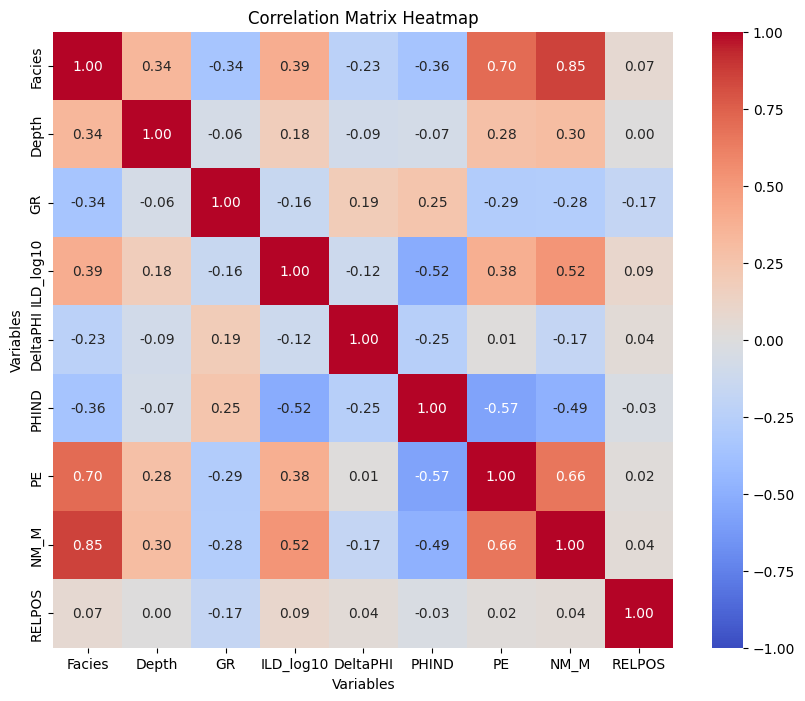

In [14]:
import seaborn as sns

%matplotlib inline
plt.figure(figsize=(14,8))

# Plot heatmap
plt.figure(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)

# Set title and labels
plt.title('Correlation Matrix Heatmap')
plt.xlabel('Variables')
plt.ylabel('Variables')

plt.show()


In [15]:
correct_facies_labels = df['Facies'].values
feature_vectors = df.drop(['Formation', 'Well Name', 'Depth','Facies','FaciesLabels'], axis=1)

In [16]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(feature_vectors)
scaled_features = scaler.transform(feature_vectors)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
        scaled_features, correct_facies_labels, test_size=0.2, random_state=10)

Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix,f1_score

RFC_model = RandomForestClassifier(max_depth=45, n_estimators=45, max_features=45).fit(X_train, y_train)

yhat_RFC = RFC_model.predict(X_test)

f1RFC = f1_score(y_test, yhat_RFC, average='weighted')

print("RFC F1-score: %.3f" % f1RFC)

conf_RFC = confusion_matrix(y_test, yhat_RFC)
conf_RFC

RFC F1-score: 0.718


array([[ 38,  12,   2,   0,   0,   0,   0,   0,   0],
       [  5, 108,  21,   0,   1,   0,   0,   0,   0],
       [  0,  28,  96,   1,   0,   0,   0,   0,   0],
       [  0,   0,   0,  27,   1,   9,   0,   1,   0],
       [  0,   1,   0,   4,  15,  12,   0,   9,   0],
       [  0,   0,   0,   3,   5,  71,   1,  10,   2],
       [  0,   0,   0,   0,   0,   1,  13,   3,   2],
       [  0,   1,   3,   3,   3,  28,   3,  78,   2],
       [  0,   0,   0,   0,   0,   1,   1,   2,  20]])

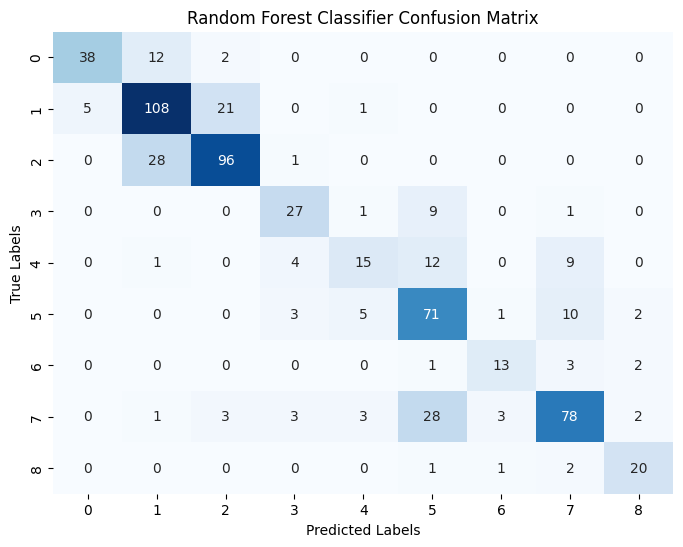

In [39]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_RFC, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.title('Random Forest Classifier Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.show()


SVM

In [40]:
from sklearn import svm
SVM_model = svm.SVC(C=45, gamma=1)

In [41]:
SVM_model.fit(X_train,y_train)

SVC(C=45, gamma=1)

In [42]:
yhat_SVM = SVM_model.predict(X_test)

In [43]:
from sklearn.metrics import confusion_matrix
conf_SVM = confusion_matrix(y_test, yhat_SVM)
conf_SVM

array([[ 39,  12,   0,   0,   1,   0,   0,   0,   0],
       [  7, 102,  26,   0,   0,   0,   0,   0,   0],
       [  2,  29,  90,   1,   1,   0,   0,   2,   0],
       [  0,   0,   0,  28,   2,   6,   0,   2,   0],
       [  0,   3,   0,   6,  20,   4,   0,   7,   1],
       [  0,   1,   1,   3,   5,  69,   0,  13,   0],
       [  0,   0,   0,   0,   1,   0,  13,   2,   3],
       [  0,   5,   4,   3,   7,  15,   1,  84,   2],
       [  0,   0,   0,   1,   0,   0,   1,   0,  22]])

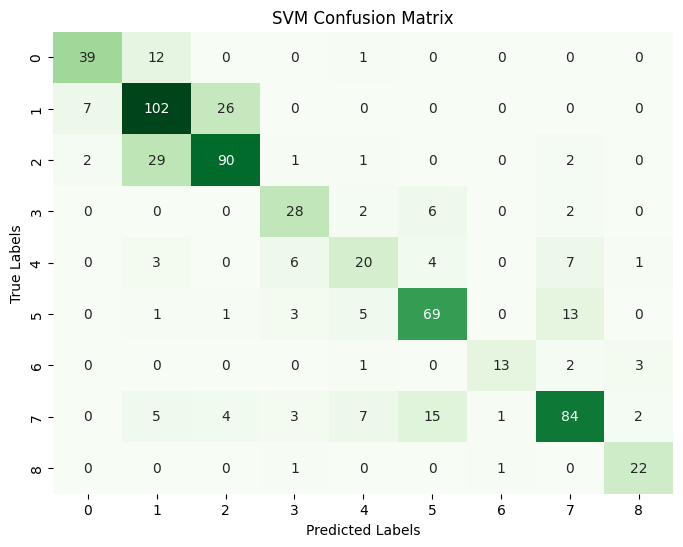

In [44]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_SVM, annot=True, fmt='d', cmap='Greens', cbar=False)

plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.show()


In [45]:
f1SVM = f1_score(y_test, yhat_SVM, average='weighted')
print("SVM F1-score: %.3f" % f1SVM  )

SVM F1-score: 0.721


KNN

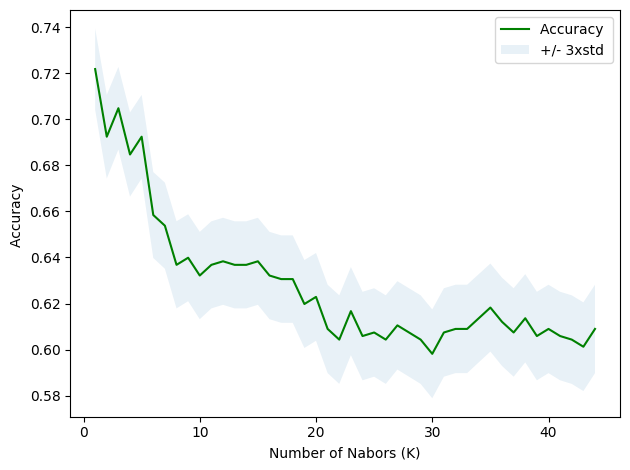

KNN F1-score: 0.703


array([[ 41,   9,   2,   0,   0,   0,   0,   0,   0],
       [  9, 100,  25,   0,   0,   0,   0,   1,   0],
       [  0,  27,  98,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,  28,   1,   8,   0,   1,   0],
       [  0,   4,   0,   4,  14,   8,   0,  10,   1],
       [  0,   0,   0,   6,   4,  61,   1,  17,   3],
       [  0,   0,   0,   0,   0,   0,  14,   3,   2],
       [  0,   3,   2,   6,   4,  18,   1,  80,   7],
       [  0,   0,   0,   1,   0,   0,   1,   1,  21]])

In [46]:
from sklearn.neighbors import KNeighborsClassifier
# to chose the best k value we may run in range of valus
Ks =45
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfusMtx = [];

for n in range(1,Ks):
    KNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    yhat = KNN_model.predict(X_test)
    mean_acc[n-1]= np.mean(yhat==y_test);
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

k = 5    #it seems 5 is good enough
KNN_model = KNeighborsClassifier(n_neighbors=k ,leaf_size=45, p=1,  weights='distance' ).fit(X_train, y_train)
KNN_model

#plot
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()


yhat_KNN = KNN_model.predict(X_test)

f1KNN = f1_score(y_test, yhat_KNN, average='weighted')

print("KNN F1-score: %.3f" % f1KNN  )

conf_KNN = confusion_matrix(y_test, yhat_KNN)
conf_KNN

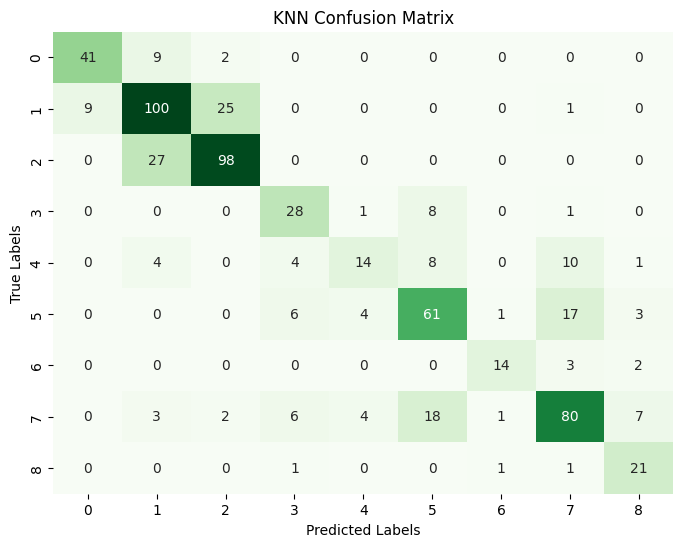

In [47]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_KNN, annot=True, fmt='d', cmap='Greens', cbar=False)

plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.show()

Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(C=1).fit(X_train,y_train)
LR_model

yhat_LR = LR_model.predict(X_test)
f1LR = f1_score(y_test, yhat_LR, average='weighted')
print("LR F1-score: %.3f" % f1LR )

conf_LR = confusion_matrix(y_test, yhat_LR)
conf_LR

LR F1-score: 0.586


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[38, 14,  0,  0,  0,  0,  0,  0,  0],
       [ 8, 99, 28,  0,  0,  0,  0,  0,  0],
       [ 2, 49, 72,  0,  1,  0,  0,  1,  0],
       [ 0,  0,  0, 18,  2, 16,  0,  2,  0],
       [ 0,  2,  0,  2,  2, 22,  1, 12,  0],
       [ 0,  0,  0,  5,  0, 70,  2, 15,  0],
       [ 0,  0,  0,  3,  0,  1,  8,  7,  0],
       [ 0,  3,  1,  1,  4, 37,  2, 64,  9],
       [ 0,  0,  0,  1,  0,  1,  0,  5, 17]])

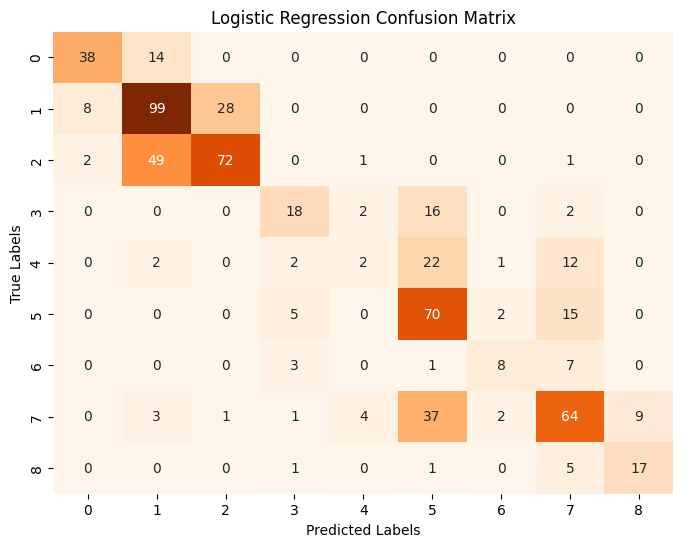

In [49]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_LR, annot=True, fmt='d', cmap='Oranges', cbar=False)

plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.show()

Naive Bayes

In [50]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

# Train the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Calculate F1 score
f1NB= f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1NB}")

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

F1 Score: 0.11877728600945593
[[ 51   0   1   0   0   0   0   0   0]
 [116   5  14   0   0   0   0   0   0]
 [ 73  20  30   0   0   0   0   0   2]
 [  0   0   0   2   0   0   0   0  36]
 [  2   0   0   0   0   0   1   0  38]
 [  0   0   0   1   0   0   0   0  91]
 [  0   0   0   3   0   0   0   0  16]
 [  4   0   0   1   0   0   0   0 116]
 [  0   0   0   1   0   0   0   0  23]]


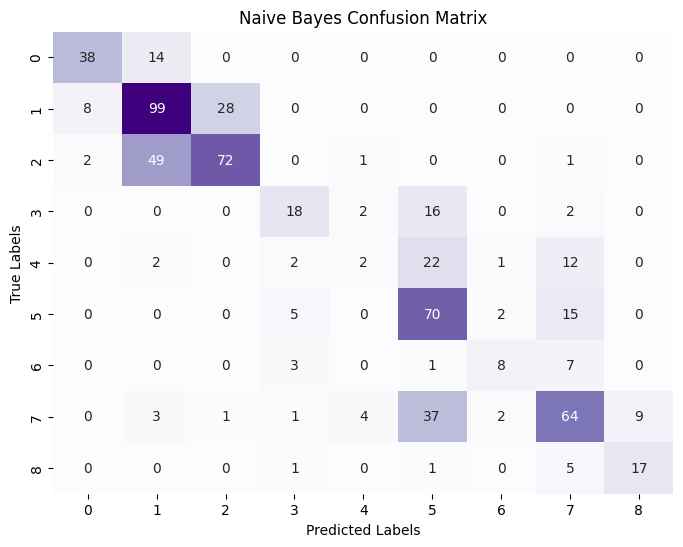

In [51]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_LR, annot=True, fmt='d', cmap='Purples', cbar=False)

plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.show()